# 1. 통계 (확률분포, 추정과 가설 검정, 분산분석, 비모수 검정)

## [연습문제]

### >>> 통계 기초

### 1. 어느 회사의 연도별 임금상승률을 조사하였더니, 아래 표와 같이 나타났다. 이 회사의 평균 임 금상승률을 구하기 위해 어떤 대푯값을 구해야 하는지 설명하고, 그 값을 계산하시오.
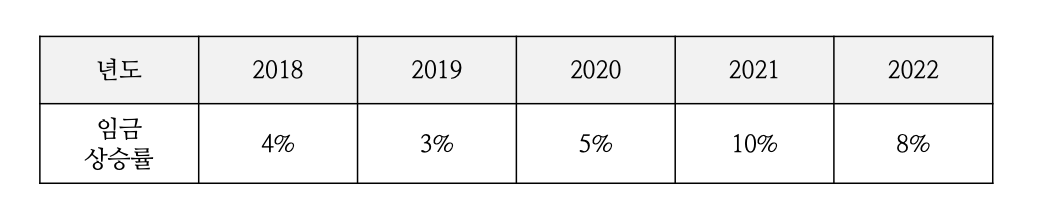

In [6]:
#대표값을 사용할때 산술평균, 기하평균, 중앙값이 있다

round((((1.04*1.03*1.05*1.1*1.08)**(1/5))-1)*100,3)

5.968

- 기하평균:연속적인 비율 또는 성장률에 대한 평균을 계산할 때 적합.
    인구 성장률이나 투자 수익률을 다룰 때 주로 사용
    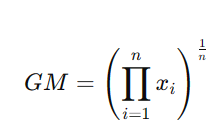
    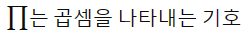
- 중앙값:데이터 세트에 극단적인 값이 있거나 비대칭적인 분포를 가질 때
    중앙값은 데이터 세트의 중앙 경향을 더 잘 나타냄.
- 산술평균: 데이터가 균등하게 분포되어 있을 때
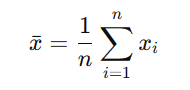

### 2. 한 회사원이 집에서 회사를 갈 때 시속 5km/h로 출근하고, 퇴근할 때 시속 7km/h로 돌아왔 다면, 이 회사원의 평균 속도를 구하기 위해 어떤 대푯값을 구해야 하는지 설명하고, 그 값을 계 산하시오.

- 2x/(x/5+x/7)
- 5.83

- 조화평균
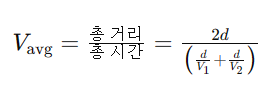

### 3. A 브랜드의 햄버거는 평균 무게 200g, 분산 49g인 정규 분포를 따르고, 샌드위치는 평균 무게 190g, 분산 36g인 정규 분포를 따른다고 한다. 방금 구매한 A 브랜드 햄버거와 샌드위치의 무게가 모두 210g이라면, 상대적으로 어느 것이 더 무거운가. 

In [11]:
#햄버거와 샌드위치
a=(210-200)/7
b=(210-190)/6
print(f'햄버거z점수:{round(a,3)}',f'샌드위치z점수:{round(b,3)}')
print("샌드위치의 z점수가 크기에 좀더 평균에서 멀리위치함을 알수 있다 상대적으로 샌드위치가 무겁다")

햄버거z점수:1.429 샌드위치z점수:3.333
샌드위치의 z점수가 크기에 좀더 평균에서 멀리위치함을 알수 있다 상대적으로 샌드위치가 무겁다


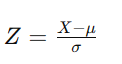
- X는 관측값,μ는 평균,σ는 표준편차

### 4. A학교와 B학교 학생들을 대상으로 100명을 추출하여 용돈을 조사하였더니, A학교는 평균 10만원, 표준편차 2만원, B학교는 평균 8만원, 표준편차 1만원으로 나타났다. 어느 학교에서 용돈의 격차가 더 심하다고 볼 수 있는가.

- 표준편차가 작은것이 격차가 덜하다는 것을 나타나기에 B학교의 용돈의 격차가 작다고 할수 있다

### >>> 확률분포

### 1. 어느 권총 사격 선수가 과녁의 정중앙을 맞힐 확률이 80%라고 한다. 이 선수가 총 5번 사격을 할 때 평균적으로 몇번 정중앙을 맞히는지 구하시오.

In [1]:
0.8*5

4.0

### 2. 전체 청소년의 40%가 11시 이전에 잠을 잔다고 한다면, 임의로 선택한 10명의 청소년 중에서 3명이 11시 이전에 잠을 잘 확률을 계산하시오. (소수점 첫째자리까지 반올림)

In [1]:
#10c3((0.4)**3)*((0.6)**7)

round(120*((0.4)**3)*((0.6)**7),1)

0.2

### 3. 어느 아파트 단지에서 밤 11시부터 새벽2시 사이에 배달되는 음식 배달 건수는 시간 당 평균 5건이다. 음식 배달 건수의 분포가 포아송분포를 따른다면 오늘 새벽 12시와 1시 사이에 배달이 1건만 발생할 확률을 구하시오. (소수점 둘째자리까지 반올림)

In [5]:
from scipy.stats import poisson
round(poisson(mu=5).pmf(1),2)

0.03

### 4. A대학교 B전공 시험의 성적 분포는 평균이 65, 표준편차 12인 정규분포를 따른다고 한다. 최고 점수부터 10%까지를 A+로 분류한다면, A+를 받기 위해 최소 몇점을 받아야 하는가?

In [12]:
from scipy.stats import norm

round(norm.ppf(0.9, 65, 12),3)

80.379

### >>> 추정과 가설 검정, 분산분석

### 1. 다음 데이터의 모분산 정보가 없을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오. 또한, 다음 데이터의 모표준편차가 3이라는 것을 알고 있을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오.

In [8]:
import numpy as np
from scipy.stats import t,norm

data = [10, 19, 15, 11, 13, 14, 18]
n= len(data)
m = np.mean(data)
s = np.std(data,ddof=1)

#모표준편차를 모를때

t_value = t.ppf(0.975, df=n-1)
error = t_value*s/np.sqrt(n)
print(round(m-error,3),round( m+error,3))

11.185 17.386


In [9]:
# 모평균에 대한 95% 신뢰수준의 신뢰구간

s1=3
z_value = norm.ppf(0.975)
error = z_value*s1/np.sqrt(n)
print(round(m-error,3),round( m+error,3))

12.063 16.508


### 2. 어느 제조회사의 불량률이 5%로 알려져 있다면, 95% 신뢰수준에서 오차의 한계가 3%가 되도록하는 최소 표본 사이즈를 구하시오.

In [10]:
# 0.975 나 0.025를 주는거 다 똑같은 결과가 나온다
z =norm.ppf(0.975)
d = 0.03
p = 0.05

n = round(((z/d)**2)*p*(1-p),0)
print(n)

203.0


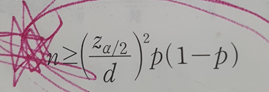

### 3. 임의로 추출한 표본 30개의 분산을 계산했더니 50일 때, 신뢰도 95%로 모분산의 신뢰구간을 추정하시오. (소수점 둘째자리까지 반올림)

In [11]:
from scipy.stats import chi2

# 상수 정의
n = 30  # 표본의 크기
S_squared = 50  # 표본 분산
alpha = 0.05  # 유의 수준

# 카이제곱 분포의 백분위수 계산
chi2_lower = chi2.ppf(alpha/2, n-1)
chi2_upper = chi2.ppf(1 - alpha/2, n-1)

# 모분산의 신뢰구간 계산
confidence_interval_lower = round((n-1) * S_squared / chi2_upper, 2)
confidence_interval_upper = round((n-1) * S_squared / chi2_lower, 2)

(confidence_interval_lower, confidence_interval_upper)


(31.71, 90.36)

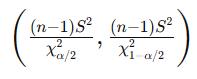

### 4. 어느 뽑기 기계에서 20번 뽑기를 했더니 그 중 5개는 미니카였다. 해당 뽑기 기계에 있는 장난감들 중 미니카의 비율을 P라고 한다면, 모비율 P에 대한 95% 신뢰구간을 구하시오.

In [12]:
n=20
p = 0.25
z = norm.ppf(0.025)
error = z*np.sqrt(p*(1-p)/n)
print(round(p - error,3), round(p+error,3))

0.44 0.06


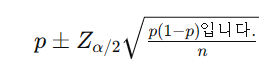

### 5. A 국가의 성인 남성의 흡연율이 35%라고 발표하였으나 B는 그것보다 더 높은 수치를 예상했다. 이에 성인 남성 중 450명을 임의 추출하여 조사한 결과 180명이 흡연자인 것을 확인하였다. 이에 대하여 귀무가설과 연구가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오. (유의수준 0.05)

In [13]:
n=450
p_hat = 180/450
p = 0.35

z = (p_hat-p)/np.sqrt(p*(1-p)/n)

print('귀무가설: 추정치와 조상결과는 같다')
print('대립가설: 조사결과가 더 높게 나온다')
print(f'{z}가 1.645 보다 크게 나옮으로 조사결과가 더 높게 나온다는 것을 알수 있다')

귀무가설: 추정치와 조상결과는 같다
대립가설: 조사결과가 더 높게 나온다
2.2237479499833053가 1.645 보다 크게 나옮으로 조사결과가 더 높게 나온다는 것을 알수 있다


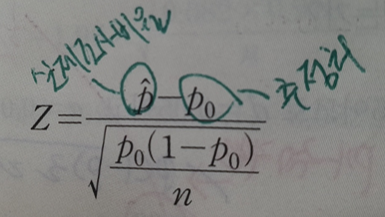

### 6. 모평균을 모르는 상황에서 표본의 정보를 통해 모분산이 10인지 아닌지 여부를 검정하고자 한다. 50개의 표본을 임의로 추출하여 계산한 결과 표본의 분산은 8.8로 나타났다. 이에 대해 귀무가설과 대립가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오. (유의수준 0.05)

- 귀무가설: 모분산은 10이다
- 대립가설: 모분산은 10이아니다

In [14]:
n= 50
s = 8.8
sigma =10

chisqure = round(((n-1)*s)/sigma,3)
print(chisqure)

# 유의수준 0.05에서의 카이제곱 분포 임계값 계산
chi_squared_lower = chi2.ppf(0.025, n - 1)  # 하위 임계값
chi_squared_upper = chi2.ppf(0.975, n - 1)  # 상위 임계값

print(chi_squared_lower, chi_squared_upper)
print('통계량은 여기 범위에 들어가기 때문에 기각할수 없다 ')
print('귀무가설을 지지한다')


43.12
31.554916462667126 70.22241356643451
통계량은 여기 범위에 들어가기 때문에 기각할수 없다 
귀무가설을 지지한다


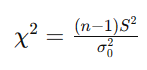
- n은 표본 크기
- S2는 표본 분산
- σ2는 귀무가설 하에서의 모분산

### 7. 50명의 당뇨 환자에 대해 신약 투약 이전과 이후의 평균 혈당 차이가 15, 표준편차 4일 때 투약 전후 평균 혈당의 차이가 존재하는지 확인하고자 한다. 이에 대해 귀무가설과 연구가설을 제시하고, 검정통계량과 유의확률을 구하여 검정 결과를 서술하시오. (유의수준 0.05)

- 귀무가설: 전과후 차이가 존재하지 않는다
- 대립가설: 차이가 존재한다

In [7]:
import numpy as np
from scipy.stats import t,norm
평균의차 = 15
표준편차 = 4
n=50

z = 15/(표준편차/np.sqrt(n))
print(z)
t.cdf(z, df=49)

26.516504294495533


1.0

### 8. 가수 A에 대한 호감도가 남녀별로 다른지 알아보고자 다음과 같은 데이터를 얻었다. 남녀 별로 지지율에 차이가 있는지 검정하시오. (유의수준 0.05)
[남성 (총 100명) 30% 호감    |    여성 (총 180명) 35% 호감]

In [8]:
p_hat = (100*0.3+180*0.35)/(100+180)
z = (0.3-0.35)/(np.sqrt(p_hat*(1-p_hat)*(1/100+1/180)))
norm.cdf(abs(z))

0.8026661769145872

- 유의수준의 범위에 들어가지 못하기 때문에 남녀의 지지율에 차이가없다

### 9. A 브랜드의 제품 14개를 추출하여 구한 평균과 표준편차는 각각 100g, 5g이고, B 브랜드의 제품 12개를 추출하여 구한 평균과 표준편차는 각각 110g, 6g이라면, 두 제품의 평균이 차이가 있는지 여부를 검정하시오. (유의수준 0.05)

In [6]:
from math import sqrt
from scipy.stats import t

# 주어진 값
mean_A = 100  # A 제품의 표본 평균
std_A = 5  # A 제품의 표본 표준편차
n_A = 14  # A 제품의 표본 크기

mean_B = 110  # B 제품의 표본 평균
std_B = 6  # B 제품의 표본 표준편차
n_B = 12  # B 제품의 표본 크기

# 두 표본 t-검정 통계량 계산
t_statistic = (mean_A - mean_B) / sqrt((std_A**2 / n_A) + (std_B**2 / n_B))

# 자유도 계산
df = ((std_A**2 / n_A + std_B**2 / n_B)**2) / \
    (((std_A**2 / n_A)**2 / (n_A-1)) + ((std_B**2 / n_B)**2 / (n_B-1)))

# p-value 계산
p_value = 2 * t.cdf(t_statistic, df)

t_statistic, p_value


(-4.5711620391383745, 0.00015678049080881457)

### 10. iris target별로 sepal length의 평균에 차이가 있는지 가설검정하시오. 차이가 있다면 어느 target들 사이에 평균 차이가 있는지 사후 검정하시오.

In [29]:
from sklearn.datasets import load_iris
from pandas import DataFrame
import numpy as np

load = load_iris()
feature_names = list(map(lambda x: x.replace("(cm)", "").replace(' ', ''), load['feature_names']))
data = DataFrame(np.c_[load['data'], load['target']], columns = feature_names+['target'])
data['target'] = data['target'].map({0:load['target_names'][0], 1:load['target_names'][1], 2:load['target_names'][2]})
print(data.head(3))

#아노바 분석

from scipy.stats import f_oneway

# 각 target별로 sepallength 데이터 추출
setosa = data[data['target'] == 'setosa']['sepallength']
versicolor = data[data['target'] == 'versicolor']['sepallength']
virginica = data[data['target'] == 'virginica']['sepallength']

# 일원분산분석(ANOVA) 수행
f_stat, p_value = f_oneway(setosa, versicolor, virginica)

print(f_stat, p_value)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD 사후검정 수행
tukey_result = pairwise_tukeyhsd(endog=data['sepallength'], groups=data['target'], alpha=0.05)

# 사후검정 결과 출력
print(tukey_result)
print('세꽃 사이에 통계적으로 유의미한 차이가 있다고 할수있다')

   sepallength  sepalwidth  petallength  petalwidth  target
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
119.26450218450468 1.6696691907693826e-31
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------
세꽃 사이에 통계적으로 유의미한 차이가 있다고 할수있다


### >>> 비모수 검정

### 1. 아래 그래프는 A,B,C 동별 입주민의 주민대표 찬반 투표 결과를 나타낸다. 동별 찬반 비율이 동일한지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)
|구분|A|B|C|
|:-:|:-:|:-:|:-:|
|찬성|50|60|65|
|반대|45|32|55|

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.DataFrame({'A':[50,45],'b':[60,32],'C':[65,55]},index = ['찬성','반대'])
a,b,c,d = chi2_contingency(df)
print("귀무가설: 비율이 동일하다")
print("대립가설: 비율이 동일하지않다")
print(f'pvalue가 {round(b,3)}로 귀무가설을 지지한다')

귀무가설: 비율이 동일하다
대립가설: 비율이 동일하지않다
pvalue가 0.16로 귀무가설을 지지한다


### 2. 특정 캠페인에 노출되기 전과 후의 캠페인 주제에 대한 지지 여부를 기록한 데이터이다. 캠페인 전후의 지지 비율이 차이가 있는지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [11]:
from pandas import read_csv
df = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice6_ba.csv', index_col=0)
print(data.head(5).T)

        0  1  2  3  4
before  1  1  1  0  1
after   0  1  1  1  0


In [19]:
from statsmodels.stats.contingency_tables import mcnemar

crs = pd.crosstab(df['before'],df['after'])
mc= mcnemar(crs.values, exact=False, correction = False)

print('귀무가설: 분포의 변화가 없다')
print('대립가설: 분포의 변화가 있다')
print(f'pvalue가 {round(mc.pvalue,3)}  임으로 귀무가설을 지지한다.')

귀무가설: 분포의 변화가 없다
대립가설: 분포의 변화가 있다
pvalue가 0.513  임으로 귀무가설을 지지한다.


### 3. 다음의 T와 F가 무작위로 나열되어 있다고 볼 수 있는지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [32]:
from statsmodels.sandbox.stats.runs import runstest_1samp

TFlist = ['T','F','F','T','F','T','F','T','T','F','F','T','F','T','F','T','F','T']

TFlist1 = list(map(lambda x:0 if x=='T' else 1, TFlist))
a,b =runstest_1samp(TFlist1)

print('귀무가설: 샘플이 무작위로 추출되었다.')
print('대립가설: 샘플이 무작위로 추출되지않았다.')
print(f'pvalue가 {round(b,3)}임으로 귀무가설을 기각한다')

귀무가설: 샘플이 무작위로 추출되었다.
대립가설: 샘플이 무작위로 추출되지않았다.
pvalue가 0.029임으로 귀무가설을 기각한다


### 4. 20대보다 30대가 기대하는 연봉상승률이 더 높다는 주장이 있다. 이 주장이 타당한지를 확인해보기 위해서 20대 10명과 30대 8명을 임의로 추출하여 기대하는 연봉상승률을 다음과 같이 정리하였다. 이 주장을 검정하기 위한 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [24]:
from scipy.stats import mannwhitneyu

A = [3.0, 3.5, 2.0, 2.8, 5.0, 0, 2.3, 2.8, 3.3, 3.5] #20대
B = [3.5, 5.5, 5.0, 5.0, 10.0, 8.0, 2.5, 3.0 ] #30대

print("귀무가설:평균이 같다")
print("귀무가설:평균이 다르다")
print(mannwhitneyu(A,B))
print('pvalue가 0.05 보다 작게 나왔음으로 귀무가설을 기각')


귀무가설:평균이 같다
귀무가설:평균이 다르다
MannwhitneyuResult(statistic=14.5, pvalue=0.025558202197791733)
pvalue가 0.05 보다 작게 나왔음으로 귀무가설을 기각


### 5. 양식, 한식, 중식에 대해 5명의 선호도를 나타내는 표이다. 선호하지 않는다를 1, 보통이다를 2, 선호한다를 3으로 응답하였다. 음식 종류에 따라 선호도 차이가 있는지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [36]:
from scipy.stats import friedmanchisquare


W = [1,3,1,3,1] # 양식
K = [1,3,3,1,1] # 한식
C = [2,3,3,3,1] # 중식

friedmanchisquare(W,K,C)
print('선호도가 차이가없다.')

선호도가 차이가없다.


### 6. A, B, C 지역 학생들의 키가 차이가 있는지 검정하기 위한 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오. (유의수준 0.05)

In [33]:
from scipy.stats import kruskal

A = [177, 167, 188, 189, 152, 159, 184, 175]
B = [151, 177, 150, 187, 167, 166, 179, 161, 174]
C = [173, 151, 156, 182, 188, 175, 150, 165, 176, 183]

a,b = kruskal(A,B,C)
print("귀무가설:평균이 같다")
print("귀무가설:평균이 다르다")
print(f'pvalue가{round(b,3)}임으로 귀무가설을 지지')


귀무가설:평균이 같다
귀무가설:평균이 다르다
pvalue가0.514임으로 귀무가설을 기각


## [기출문제]
- ADP 29회 기출 (https://www.datamanim.com/dataset/ADPpb/00/29.html)

### 1. 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

In [41]:
from scipy.stats import binom
round(binom.pmf(3, 25,3/100),5)

0.03177

### 2. C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

In [46]:
df = pd.DataFrame({'c':[600,400],'D':[200,300]})
a,b,c,d = chi2_contingency(df)
print(f' pvalue는 {round(b,3)}는 0,05 보작 작게 나옮온다')
print("귀무가설:평균이 같다")
print("대립가설:평균이 다르다")
print('대립가설을 지지')

 pvalue는 0.0는 0,05 보작 작게 나옮온다
귀무가설:평균이 같다
대립가설:평균이 다르다
대립가설을 지지


### 3-1. 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.
- 데이터 설명 : 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

In [12]:
import pandas as pd
from scipy.stats import kruskal

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
df.head()
a = df[df['name']=='A']['ratio']
b = df[df['name']=='B']['ratio']
c = df[df['name']=='C']['ratio']
d = df[df['name']=='D']['ratio']
print(kruskal(a,b,c,d))
print('pvalue가 0.05보다 작게 나왔기 때문에 범퍼 파손정도에 중앙값이 다른 집단이 있다.')

KruskalResult(statistic=16.30285714285715, pvalue=0.0009828450922041117)
pvalue가 0.05보다 작게 나왔기 때문에 범퍼 파손정도에 중앙값이 다른 집단이 있다.


### 3-2. 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


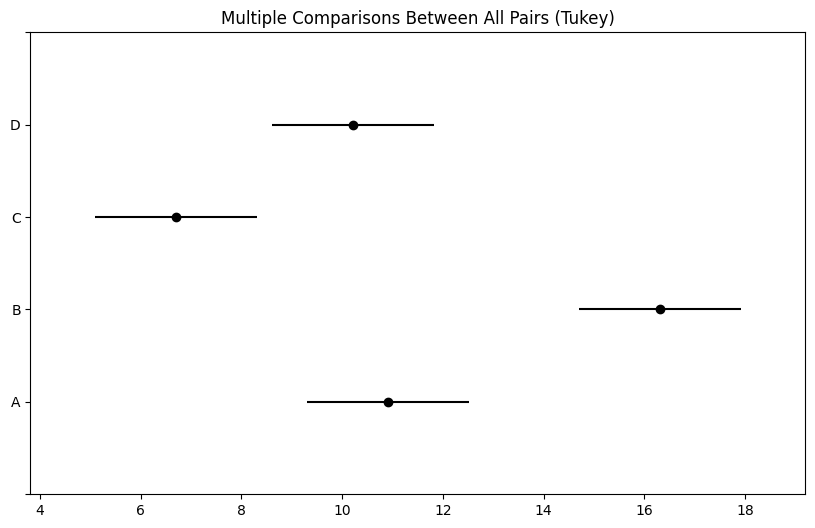

In [16]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
from matplotlib import pyplot as plt

mc = MultiComparison(data = df['ratio'],groups=df['name']).tukeyhsd(alpha=0.05)
print(mc)
mc.plot_simultaneous()
plt.show()

### 4. L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 1.1% , 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

In [3]:
round((0.13*0.011)/(0.13*0.011+0.37*0.021+0.5*0.033),2)

0.06